## **MLP Neural Network for Classification Problem of Handwritten Digits Data Set**

## 1. **Introduction**
In this project, we have used a data set with examples of handwritten digits. There are 1797 examples and each example has 64 pixels as inputs and 1 output (0,1,2,3,... or 9).

Our main objective was to train a Multilayer Perceptron (MLP) neural network in order to classify correctly the handwritten of a test data set.

Information about the dataset (from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html):
* Classes: 10
* Samples per class: ~180
* Samples total: 1797
* Dimensionality: 64
* Features: integers 0-16

In [1]:
pip install scikit-plot==0.3.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Dense, Input
from keras.layers import Conv2D, Flatten
from keras.models import Sequential
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

Upload of the data set

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [5]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
pixels = pd.DataFrame(digits['data'])
target = pd.DataFrame(digits['target'])
list(target)

[0]

**One-hot encoding**

In [7]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_target = pd.DataFrame(encoder.fit_transform(target).toarray())
encoder_target

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1793,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Normalize and separate training, validation and test datasets**

In [8]:
X = pixels.values
y = encoder_target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(X_train)   #we fit the scaler only with X_train

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define parameters for all networks

In [9]:
n_epochs=1000

## **Definition and Training of Network 1**

In [10]:
input_dim = X_train.shape[1]    #entrada tem dimensão 64, isto é, 64 nós de entrada

model_1 = Sequential()

model_1.add(Dense(2,input_shape=(input_dim,),activation='relu'))  #hidden layer
model_1.add(Dense(10, activation='softmax'))  #outuput layer has 10 neuros (0,1,2,3,...,9)

#As we are working with ten classes (classification), our loss function will be
#Binary Cross Entropy. Furthermore, metrics will be accurracy

model_1.compile(optimizer= 'SGD', loss='CategoricalCrossentropy', metrics='accuracy')
model_1.summary()

history_1 = model_1.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=n_epochs,verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 130       
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


# **Evaluation of Network 1**


In [11]:
#Loss function: Categorical Cross Entropy
cross_entropy_1 = model_1.evaluate(X_test,y_test,verbose=0)

In [12]:
test_predictions_1 = model_1.predict(X_test)
y_predicted = []
for i in range(360):
  y_predicted.append(np.argmax(test_predictions_1[i]))
y_true = []
for i in range(360):
  y_true.append(np.argmax(y_test[i]))

12/12 [==============================] - 0s 2ms/step


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


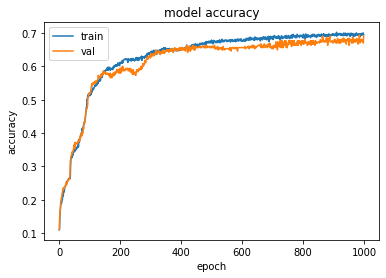

In [13]:
# list all data in history
print(history_1.history.keys()) 
# summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Let's plot the confusion matrix** (reference: https://stackoverflow.com/questions/65618137/confusion-matrix-for-multiple-classes-in-python)

Text(0.5, 1.0, 'Refined Confusion Matrix 1')

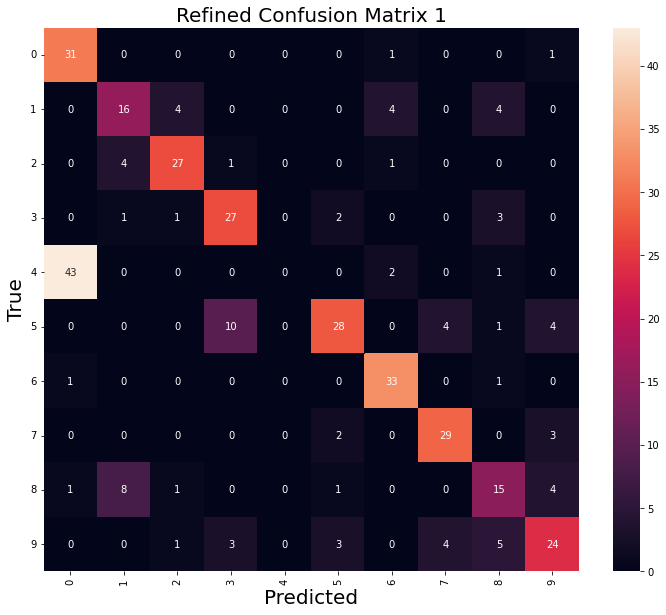

In [14]:
cm = confusion_matrix(y_true, y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
#ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
#ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix 1', fontsize=20)

## **Definition and Training of Network 2**

In [15]:
input_dim = X_train.shape[1]    #entrada tem dimensão 64, isto é, 64 nós de entrada

model_2 = Sequential()

model_2.add(Dense(5,input_shape=(input_dim,),activation='relu'))  #hidden layer
model_2.add(Dense(10, activation='softmax'))  #outuput layer has 10 neuros (0,1,2,3,...,9)

#As we are working with ten classes (classification), our loss function will be
#Binary Cross Entropy. Furthermore, metrics will be accurracy

model_2.compile(optimizer= 'SGD', loss='CategoricalCrossentropy', metrics='accuracy')
model_2.summary()

history_2 = model_2.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=n_epochs,verbose=0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
 dense_3 (Dense)             (None, 10)                60        
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


# **Evaluation of Network 2**


In [16]:
#Loss function: Categorical Cross Entropy
cross_entropy_2 = model_2.evaluate(X_test,y_test,verbose=0)

In [17]:
test_predictions_2 = model_2.predict(X_test)
y_predicted = []
for i in range(360):
  y_predicted.append(np.argmax(test_predictions_2[i]))
y_true = []
for i in range(360):
  y_true.append(np.argmax(y_test[i]))

12/12 [==============================] - 0s 2ms/step


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


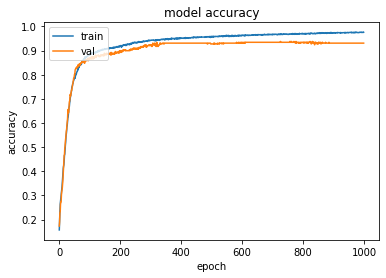

In [18]:
# list all data in history
print(history_2.history.keys()) 
# summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Let's plot the confusion matrix** (reference: https://stackoverflow.com/questions/65618137/confusion-matrix-for-multiple-classes-in-python)

Text(0.5, 1.0, 'Refined Confusion Matrix 2')

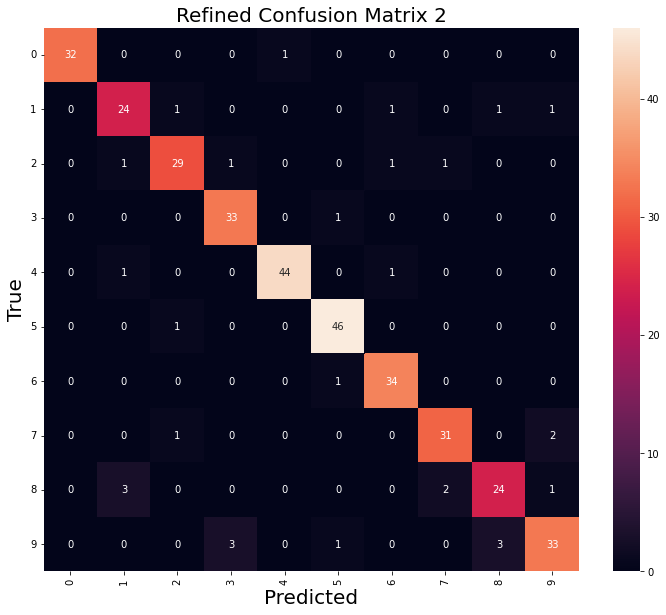

In [19]:
cm = confusion_matrix(y_true, y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
#ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
#ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix 2', fontsize=20)

## **Definition and Training of Network 3**

In [20]:
input_dim = X_train.shape[1]    #entrada tem dimensão 64, isto é, 64 nós de entrada

model_3 = Sequential()
model_3.add(Dense(10,input_shape=(input_dim,),activation='relu'))  #hidden layer
model_3.add(Dense(10, activation='softmax'))  #outuput layer has 10 neuros (0,1,2,3,...,9)

#As we are working with ten classes (classification), our loss function will be
#Binary Cross Entropy. Furthermore, metrics will be accurracy

model_3.compile(optimizer= 'SGD', loss='CategoricalCrossentropy', metrics='accuracy')
model_3.summary()
history_3 = model_3.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=n_epochs,verbose=0)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                650       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 760
Trainable params: 760
Non-trainable params: 0
_________________________________________________________________


# **Evaluation of Network 3**


In [21]:
#Loss function: Categorical Cross Entropy
cross_entropy_3 = model_3.evaluate(X_test,y_test,verbose=0)

In [22]:
test_predictions_3 = model_3.predict(X_test)
y_predicted = []
for i in range(360):
  y_predicted.append(np.argmax(test_predictions_3[i]))
y_true = []
for i in range(360):
  y_true.append(np.argmax(y_test[i]))

12/12 [==============================] - 0s 2ms/step


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


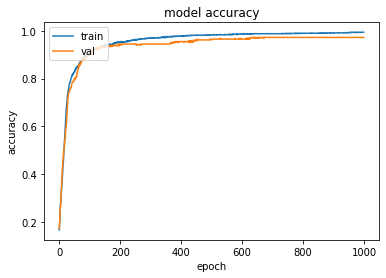

In [23]:
# list all data in history
print(history_3.history.keys()) 
# summarize history for accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Let's plot the confusion matrix** (reference: https://stackoverflow.com/questions/65618137/confusion-matrix-for-multiple-classes-in-python)

Text(0.5, 1.0, 'Refined Confusion Matrix 3')

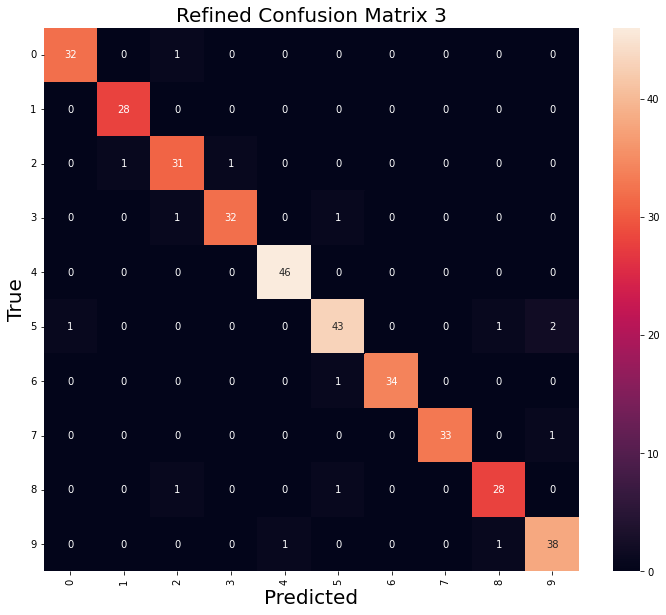

In [24]:
cm = confusion_matrix(y_true, y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
#ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
#ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix 3', fontsize=20)

## **Definition and Training of Network 4**

In [25]:
noise = np.random.normal(0,1,X_train.shape)
X_train_noise = X_train+0.2*noise
noise = np.random.normal(0,1,X_val.shape)
X_val_noise = X_val+0.2*noise

In [26]:
input_dim = X_train.shape[1]    #entrada tem dimensão 64, isto é, 64 nós de entrada

model_4 = Sequential()
model_4.add(Dense(5,input_shape=(input_dim,),activation='relu'))  #hidden layer
model_4.add(Dense(5,input_shape=(input_dim,),activation='relu'))  #hidden layer
model_4.add(Dense(10, activation='softmax'))  #outuput layer has 10 neuros (0,1,2,3,...,9)

#As we are working with ten classes (classification), our loss function will be
#Binary Cross Entropy. Furthermore, metrics will be accurracy

model_4.compile(optimizer= 'SGD', loss='CategoricalCrossentropy', metrics='accuracy')
model_4.summary()

history_4 = model_4.fit(X_train_noise, y_train, validation_data = (X_val_noise,y_val), epochs=n_epochs,verbose=0)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 325       
                                                                 
 dense_7 (Dense)             (None, 5)                 30        
                                                                 
 dense_8 (Dense)             (None, 10)                60        
                                                                 
Total params: 415
Trainable params: 415
Non-trainable params: 0
_________________________________________________________________


# **Evaluation of Network 4**


In [27]:
cross_entropy_4 = model_4.evaluate(X_test,y_test,verbose=0)

In [28]:
test_predictions_4 = model_4.predict(X_test)
y_predicted = []
for i in range(360):
  y_predicted.append(np.argmax(test_predictions_4[i]))
y_true = []
for i in range(360):
  y_true.append(np.argmax(y_test[i]))

12/12 [==============================] - 0s 1ms/step


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


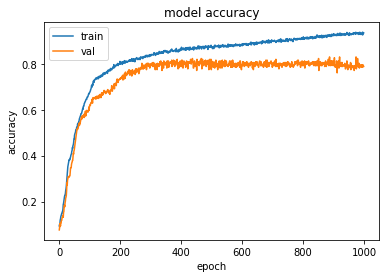

In [29]:
# list all data in history
print(history_4.history.keys()) 
# summarize history for accuracy
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Let's plot the confusion matrix** (reference: https://stackoverflow.com/questions/65618137/confusion-matrix-for-multiple-classes-in-python)

Text(0.5, 1.0, 'Refined Confusion Matrix 4')

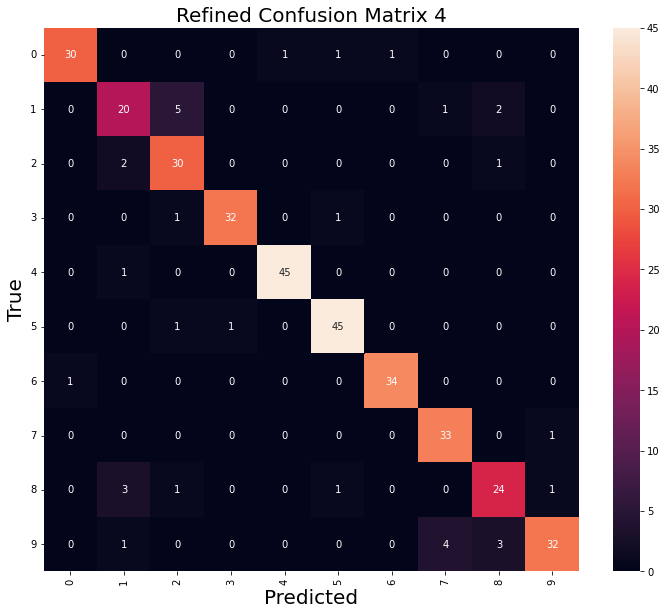

In [30]:
cm = confusion_matrix(y_true, y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
#ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
#ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix 4', fontsize=20)

## **Definition and Training of Network 4 with Regularization**

In [31]:
input_dim = X_train.shape[1]    #entrada tem dimensão 64, isto é, 64 nós de entrada

model_4_reg = Sequential()

model_4_reg.add(Dense(5,input_shape=(input_dim,),activation='relu',kernel_regularizer='l2'))  #hidden layer
model_4_reg.add(Dense(5,input_shape=(input_dim,),activation='relu'))  #hidden layer
model_4_reg.add(Dense(10, activation='softmax'))  #outuput layer has 10 neuros (0,1,2,3,...,9)

#As we are working with ten classes (classification), our loss function will be
#Binary Cross Entropy. Furthermore, metrics will be accurracy

model_4_reg.compile(optimizer= 'SGD', loss='CategoricalCrossentropy', metrics='accuracy')
model_4_reg.summary()

history_4_reg = model_4_reg.fit(X_train_noise, y_train, validation_data = (X_val_noise,y_val), epochs=n_epochs,verbose=0)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 5)                 325       
                                                                 
 dense_10 (Dense)            (None, 5)                 30        
                                                                 
 dense_11 (Dense)            (None, 10)                60        
                                                                 
Total params: 415
Trainable params: 415
Non-trainable params: 0
_________________________________________________________________


# **Evaluation of Network 4 with Regularization**


In [32]:
cross_entropy_4_reg = model_4_reg.evaluate(X_test,y_test,verbose=0)

In [33]:
test_predictions_4_reg = model_4_reg.predict(X_test)
y_predicted = []
for i in range(360):
  y_predicted.append(np.argmax(test_predictions_4_reg[i]))
y_true = []
for i in range(360):
  y_true.append(np.argmax(y_test[i]))

12/12 [==============================] - 0s 1ms/step


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


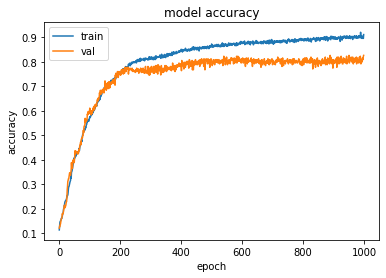

In [34]:
# list all data in history
print(history_4_reg.history.keys()) 
# summarize history for accuracy
plt.plot(history_4_reg.history['accuracy'])
plt.plot(history_4_reg.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Let's plot the confusion matrix** (reference: https://stackoverflow.com/questions/65618137/confusion-matrix-for-multiple-classes-in-python)

Text(0.5, 1.0, 'Refined Confusion Matrix 4')

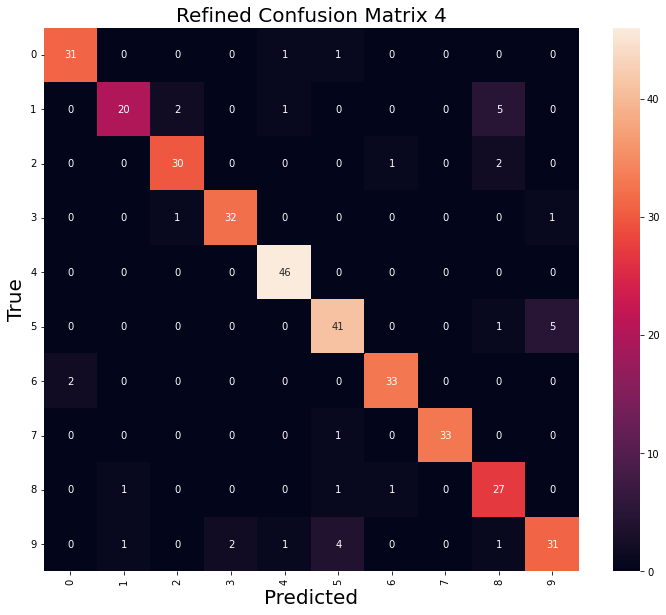

In [35]:
cm = confusion_matrix(y_true, y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
#ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
#ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix 4', fontsize=20)

## **Definition and Training of Network 5**

In [36]:
input_dim = X_train.shape[1]    #entrada tem dimensão 64, isto é, 64 nós de entrada

model_5 = Sequential()

model_5.add(Dense(100,input_shape=(input_dim,),activation='relu'))  #hidden layer
model_5.add(Dense(100,input_shape=(input_dim,),activation='relu'))  #hidden layer
model_5.add(Dense(100,input_shape=(input_dim,),activation='relu'))  #hidden layer
model_5.add(Dense(100,input_shape=(input_dim,),activation='relu'))  #hidden layer
model_5.add(Dense(10, activation='softmax'))  #outuput layer has 10 neuros (0,1,2,3,...,9)

#As we are working with ten classes (classification), our loss function will be
#Binary Cross Entropy. Furthermore, metrics will be accurracy


#opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model_5.compile(optimizer= 'SGD', loss='CategoricalCrossentropy', metrics='accuracy')
model_5.summary()

history_5 = model_5.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=n_epochs,verbose=0)
#history_5 = model_5.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=200,verbose=0)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               6500      
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
Total params: 37,810
Trainable params: 37,810
Non-trainable params: 0
_________________________________________________________________


# **Evaluation of Network 5**


In [37]:
cross_entropy_5 = model_5.evaluate(X_test,y_test,verbose=0)

In [38]:
test_predictions_5 = model_5.predict(X_test)
y_predicted = []
for i in range(360):
  y_predicted.append(np.argmax(test_predictions_5[i]))
y_true = []
for i in range(360):
  y_true.append(np.argmax(y_test[i]))

12/12 [==============================] - 0s 2ms/step


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


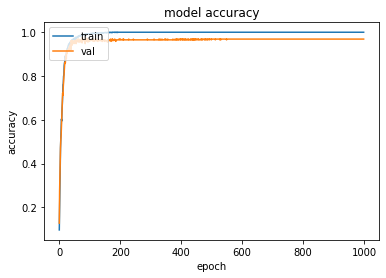

In [39]:
# list all data in history
print(history_5.history.keys()) 
# summarize history for accuracy
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Let's plot the confusion matrix** (reference: https://stackoverflow.com/questions/65618137/confusion-matrix-for-multiple-classes-in-python)

Text(0.5, 1.0, 'Refined Confusion Matrix 5')

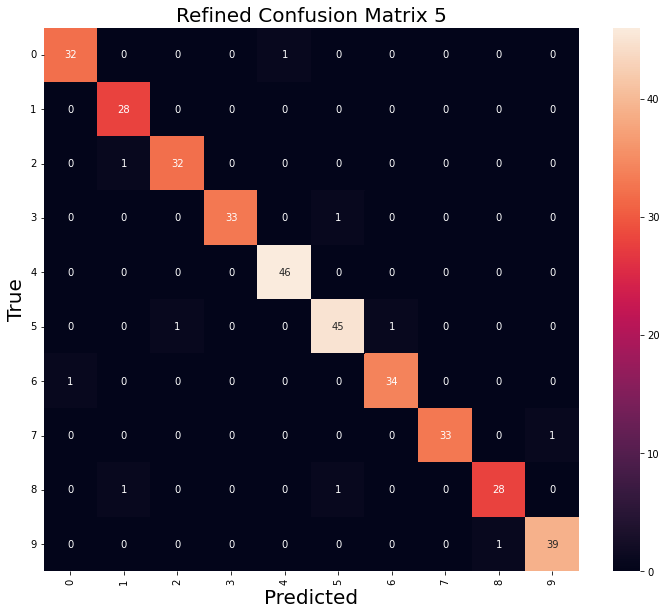

In [40]:
cm = confusion_matrix(y_true, y_predicted)
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
#ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
#ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix 5', fontsize=20)

### **Learning Rate Influence**

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


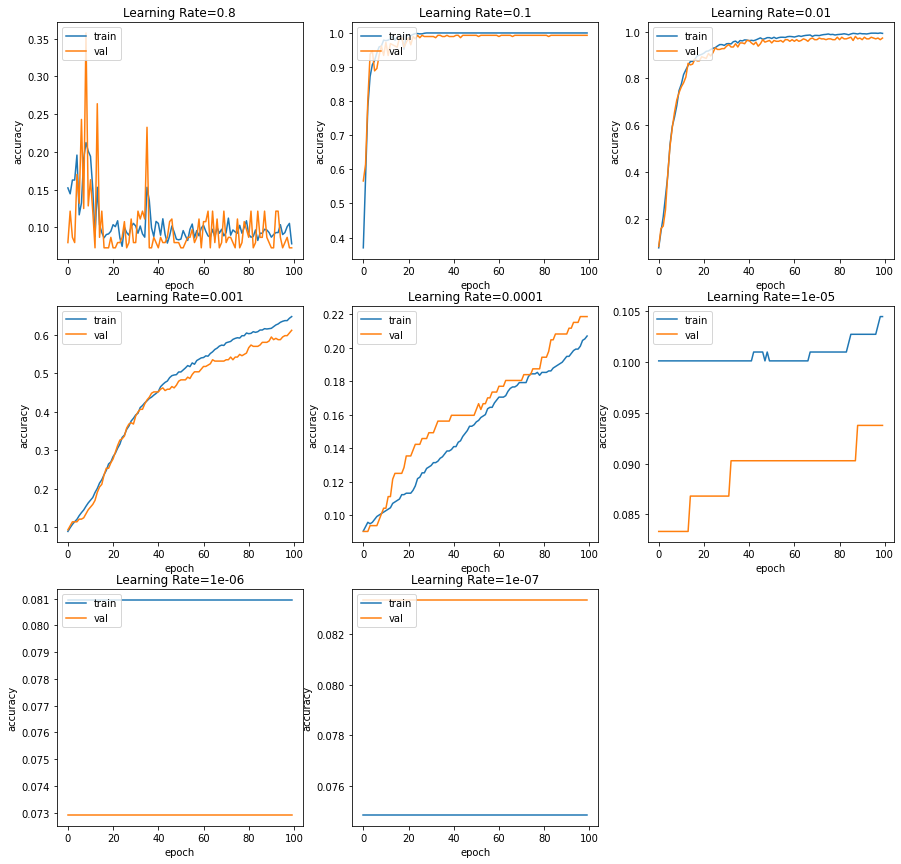

In [41]:
#Esse trecho foi adaptado de https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

def fit_model(X_train,y_train,X_val,y_val,lrate):
  #define model
  input_dim = X_train.shape[1]    #entrada tem dimensão 64, isto é, 64 nós de entrada
  model_6 = Sequential()
  model_6.add(Dense(100,input_shape=(input_dim,),activation='relu'))  #hidden layer
  model_6.add(Dense(100,input_shape=(input_dim,),activation='relu'))  #hidden layer
  model_6.add(Dense(100,input_shape=(input_dim,),activation='relu'))  #hidden layer
  model_6.add(Dense(100,input_shape=(input_dim,),activation='relu'))  #hidden layer
  model_6.add(Dense(10, activation='softmax'))  #outuput layer has 10 neuros (0,1,2,3,...,9)
  
  #compile model
  #As we are working with ten classes (classification), our loss function will be
  #Binary Cross Entropy. Furthermore, metrics will be accurracy
  #opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
  opt = tf.keras.optimizers.SGD(lr=lrate)
  model_6.compile(optimizer= opt, loss='CategoricalCrossentropy', metrics='accuracy')
  #model_5.summary()

  
  #fit model
  history_6 = model_6.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=100,verbose=0)
  
  #plot learning curves
  plt.title('Learning Rate='+str(lrate))
  plt.plot(history_6.history['accuracy'])
  plt.plot(history_6.history['val_accuracy'])
  #plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')

plt.figure(figsize=(15, 20))
# create learning curves for different learning rates
learning_rates = [0.8, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range(len(learning_rates)):
	# determine the plot number
	plot_no = 430 + (i+1)
	plt.subplot(plot_no)
	# fit model and plot learning curves for a learning rate
	fit_model(X_train, y_train, X_val, y_val, learning_rates[i])
# show learning curves
plt.show()

### **Analysis of Learning Rate Influence**

Para learning rates mais baixas, o sistema aprende mais devagar, dado que a atualização dos pesos ocorre em passos menores.

É interessante notar que, para learning rates muito baixas, a rede neural não consegue aprender praticamente nada, dado que a atualização dos pesos é bem pequena.

Para o caso de learning rates mais altas (como 0.1), o sistema apresenta oscilações significativas, dado que a variação dos pesos em cada atualização é mais alta. No primeiro caso (learning rate = 0.8), os passos de atualização são tão grandes que a rede nem é realmente capaz de encontrar e convergir para o mínimo.

### **Momentum Dynamics**

O uso de momentum pode fazer com que a rede não fique presa em mínimos locais e evolua para achar o mínimo global. Tal efeito pode acelerar o processo de treinamento.

Vamos avaliar o efeito do momentum utilizando uma learning rate constante igual a 0.001.

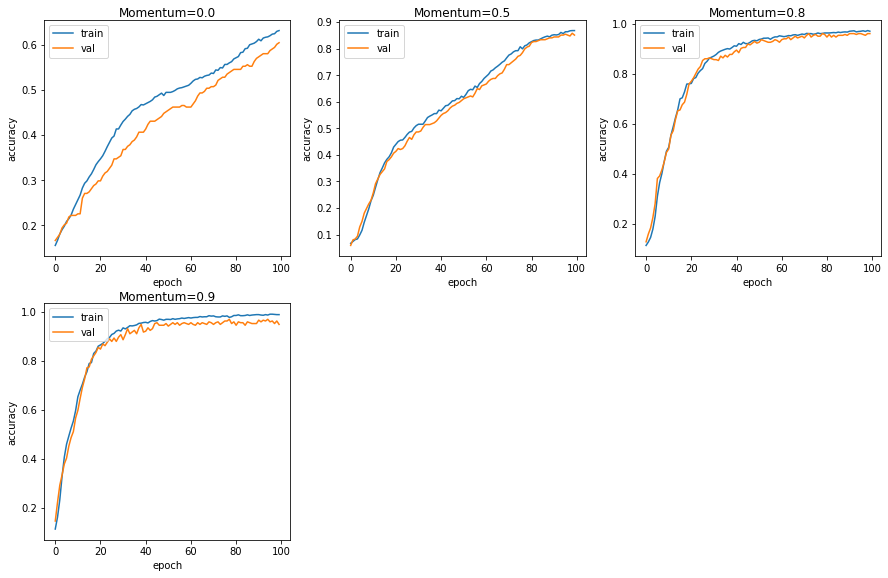

In [42]:
#Esse trecho foi adaptado de https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

def fit_model(X_train,y_train,X_val,y_val,momentum):
  #define model
  input_dim = X_train.shape[1]    #entrada tem dimensão 64, isto é, 64 nós de entrada
  model_6 = Sequential()
  model_6.add(Dense(100,input_shape=(input_dim,),activation='relu'))  #hidden layer
  model_6.add(Dense(100,input_shape=(input_dim,),activation='relu'))  #hidden layer
  model_6.add(Dense(100,input_shape=(input_dim,),activation='relu'))  #hidden layer
  model_6.add(Dense(100,input_shape=(input_dim,),activation='relu'))  #hidden layer
  model_6.add(Dense(10, activation='softmax'))  #outuput layer has 10 neuros (0,1,2,3,...,9)
  
  #compile model
  #As we are working with ten classes (classification), our loss function will be
  #Binary Cross Entropy. Furthermore, metrics will be accurracy
  #opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
  opt = tf.keras.optimizers.SGD(lr=0.001,momentum=momentum)
  model_6.compile(optimizer= opt, loss='CategoricalCrossentropy', metrics='accuracy')
  #model_5.summary()

  
  #fit model
  history_6 = model_6.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=100,verbose=0)
  
  #plot learning curves
  plt.title('Momentum='+str(momentum), pad=-80)
  plt.plot(history_6.history['accuracy'])
  plt.plot(history_6.history['val_accuracy'])
  #plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')

plt.figure(figsize=(15, 20))
# create learning curves for different learning rates
momentums = [0.0, 0.5, 0.8,0.9]
for i in range(len(momentums)):
	# determine the plot number
	plot_no = 430 + (i+1)
	plt.subplot(plot_no)
	# fit model and plot learning curves for a learning rate
	fit_model(X_train, y_train, X_val, y_val, momentums[i])
# show learning curves
plt.show()

### **Analysis of Momentum Dynamics**

Como previsto, o momentum realmente tem um efeito de acelerar o treinamento, por impedir que o treinamento fique preso em mínimos locais, fazendo com que o erro de treinamento e o erro de validação atinjam valores baixos bem mais rápido.

## 2. **General Results**

Mean Squared Error (MSE) for the five proposed networks

In [46]:
print(f'Cross-Entropy of Network 1: {cross_entropy_1}')
print(f'Cross-Entropy of Network 2: {cross_entropy_2}')
print(f'Cross-Entropy of Network 3: {cross_entropy_3}')
print(f'Cross-Entropy of Network 4: {cross_entropy_4}')
print(f'Cross-Entropy of Network 4 w/ reg: {cross_entropy_4_reg}')
print(f'Cross-Entropy of Network 5: {cross_entropy_5}')

Cross-Entropy of Network 1: [0.877274751663208, 0.6388888955116272]
Cross-Entropy of Network 2: [0.2585605978965759, 0.9166666865348816]
Cross-Entropy of Network 3: [0.12951861321926117, 0.9583333134651184]
Cross-Entropy of Network 4: [0.3630741536617279, 0.9027777910232544]
Cross-Entropy of Network 4 w/ reg: [0.39116227626800537, 0.8999999761581421]
Cross-Entropy of Network 5: [0.1794065237045288, 0.9722222089767456]


É interessante notar que, aparentemente, para redes mais elaboradas que puderam aprender melhor o comportamento dos dados, o primeiro termo da cross-entropy tende a diminuir e o segundo termo da cross-entropy tende a aumentar.

Evolution of the training (train/validation) for the five proposed networks

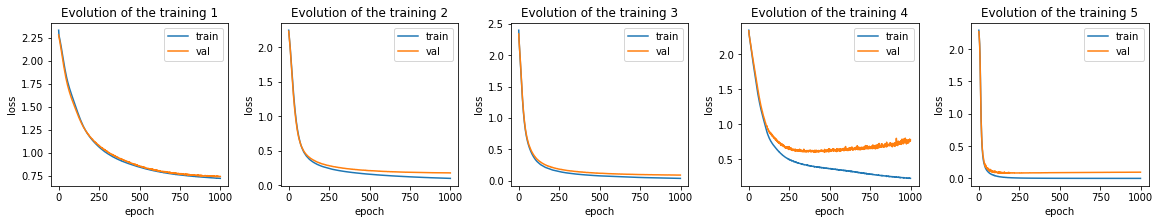

In [44]:
fig2, axes2 = plt.subplots(nrows = 1, ncols = 5,figsize=(16, 3),constrained_layout = True)

histories = [history_1.history,history_2.history,history_3.history,history_4.history,history_5.history]

i=0
for current_ax in axes2:
  current_ax.set_title(f"Evolution of the training %i"%(i+1))
  current_ax.set_xlabel('epoch')
  current_ax.set_ylabel('loss')
  current_ax.plot(histories[i]['loss'])
  current_ax.plot(histories[i]['val_loss'])
  current_ax.legend(['train', 'val'], loc='upper right')
  i=i+1

## **Discussion**

É interessante notar que, observando as matrizes de confusão, percebemos que a única rede neural que teve um desempenho realmente bastante ruim foi a primeira. Tendo apenas 2 neurônios em sua única camada oculta, ela não foi capaz de aprender os padrões.

Já a segunda rede neural propostas, que também tinha apenas uma camada oculta, mas com 5 neurônios, foi capaz de aprender bem melhor os padrões.

Observando os gráficos da evolução do treinamento, vemos que a última rede convergiu para um valor baixo de erro bem mais rápido que as demais. Isso se deve ao fato de que a arquitetura dela é bem maior, com muito mais neurônios

**Evaluation of the Regularization Effect**

Na rede neural de número 4, acrescentamos um ruído no sinal de entrada para garantir que iríamos observar o efeito de overfitting, isto é, que o erro de treinamento cairia continuamente, entretanto o erro de validação começaria a aumentar a partir de certo momento. Isso é um indício de que a rede estava decorando os dados de treinamento e não conseguia generalizar corretamente as classificações para outros dados.

Modificamos a rede introduzindo uma regularização L2. Com isso, pudemos observar que não mais ocorreu o comportamento tão acentuado de o erro de validação aumentar durante o treinamento.

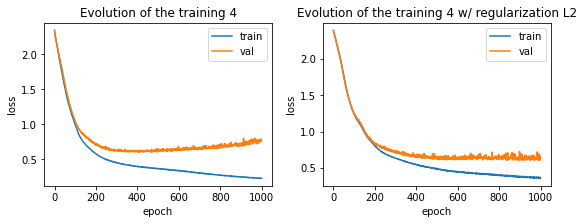

In [45]:
fig3, axes3 = plt.subplots(nrows = 1, ncols = 2,figsize=(8, 3),constrained_layout = True)

histories = [history_4.history,history_4_reg.history]

i=0
for current_ax in axes3:
  if (i==0):
    current_ax.set_title(f"Evolution of the training 4")
  if (i==1):
    current_ax.set_title(f"Evolution of the training 4 w/ regularization L2")
  current_ax.set_xlabel('epoch')
  current_ax.set_ylabel('loss')
  current_ax.plot(histories[i]['loss'])
  current_ax.plot(histories[i]['val_loss'])
  current_ax.legend(['train', 'val'], loc='upper right')
  i=i+1